# Who is the typical coder?

## Setup

In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 200
pd.options.display.max_colwidth = 500
pd.options.display.max_rows = 100

%matplotlib inline
%load_ext lab_black

## Business/Data understanding

What does the typical coder look like? What can we learn from the frequency of responses to the Stackoverflow survey?

### General information

In [2]:
questions = pd.read_csv("data/survey_results_schema.csv")

questions

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order of survey response time)
1,MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."""
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open source software (OSS)?
5,Employment,Which of the following best describes your current employment status?
6,Country,In which country do you currently reside?
7,Student,"Are you currently enrolled in a formal, degree-granting college or university program?"
8,EdLevel,Which of the following best describes the highest level of formal education that you’ve completed?
9,UndergradMajor,What was your main or most important field of study?


In [3]:
responses = pd.read_csv("data/survey_results_public.csv")

responses.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Respondent,88883,NaN,NaN,NaN,44442,25658.5,1,22221.5,44442,66662.5,88883
MainBranch,88331,5,I am a developer by profession,65679,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hobbyist,88883,2,Yes,71257,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OpenSourcer,88883,4,Never,32295,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OpenSource,86842,3,The quality of OSS and closed source software is about the same,41527,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Employment,87181,6,Employed full-time,64440,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,88751,179,United States,20949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Student,87014,3,No,65816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EdLevel,86390,9,"Bachelor’s degree (BA, BS, B.Eng., etc.)",39134,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UndergradMajor,75614,12,"Computer science, computer engineering, or software engineering",47214,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Top responses

In [4]:
topResponses = (
    responses.describe(include="all")
    .T[["top", "freq"]]
    .set_index(["top"], append=True)
    .dropna()
)  # .sort_values(by="freq", ascending=False)
topResponses

,,freq
,top,
MainBranch,I am a developer by profession,65679
Hobbyist,Yes,71257
OpenSourcer,Never,32295
OpenSource,The quality of OSS and closed source software is about the same,41527
Employment,Employed full-time,64440
Country,United States,20949
Student,No,65816
EdLevel,"Bachelor’s degree (BA, BS, B.Eng., etc.)",39134
UndergradMajor,"Computer science, computer engineering, or software engineering",47214


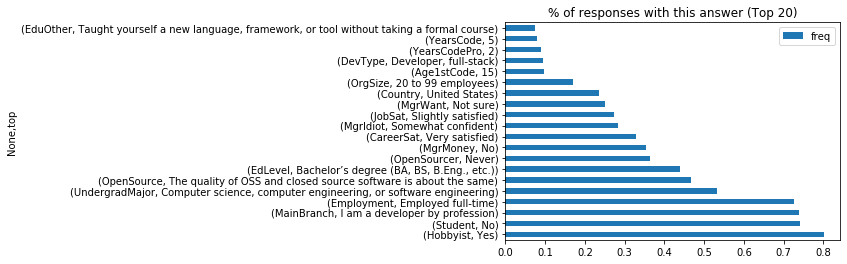

In [5]:
(topResponses[:20][["freq"]] / responses.shape[0]).sort_values(
    by="freq", ascending=False
).plot(kind="barh", title="% of responses with this answer (Top 20)")

### Variability of responses

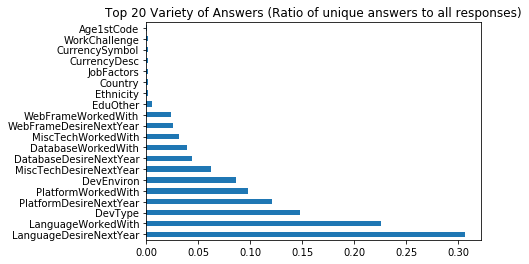

In [6]:
uniqResponses = responses.describe(include="all").T["unique"].dropna()

(uniqResponses.sort_values(ascending=False)[:20] / responses.shape[0]).plot(
    kind="barh",
    title="Top 20 Variety of Answers (Ratio of unique answers to all responses)",
)

### Numeric fields

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000053D8C14588>,
      dtype=object)

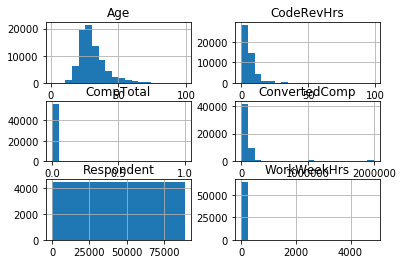

In [7]:
responses.hist(bins=20)

### Finding the Pythonistas

How do we find people who identify as Python developers. Let's look in the LanguageWorkedWith field for the answer...

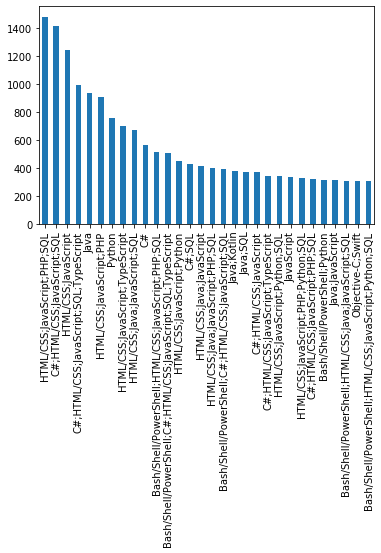

In [8]:
responses.LanguageWorkedWith.value_counts()[:30].plot(kind="bar")

In [9]:
langUsed = ";".join(role for role in responses.LanguageWorkedWith.dropna()).split(";")
langUsed[:20]

['HTML/CSS',
 'Java',
 'JavaScript',
 'Python',
 'C++',
 'HTML/CSS',
 'Python',
 'HTML/CSS',
 'C',
 'C++',
 'C#',
 'Python',
 'SQL',
 'C++',
 'HTML/CSS',
 'Java',
 'JavaScript',
 'Python',
 'SQL',
 'VBA']

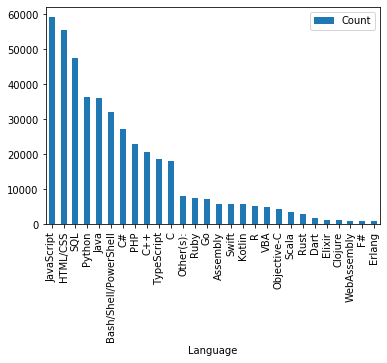

In [10]:
pd.DataFrame([[x,langUsed.count(x)] for x in set(langUsed)], columns=["Language", "Count"]).set_index(["Language"]).sort_values(by="Count", ascending=False).plot(kind="bar")

Each person may have selected many programming languages types. For our purposes anyone who selects "Python" qualifies - regardless of what else they may select.

In [11]:
print("There are {0} Pythonistas out of {1} respondents".format(
    len(responses[responses.LanguageWorkedWith.str.contains("Python").fillna(False)])
    , len(responses)))

There are 36443 Pythonistas out of 88883 respondents


## Data Preparation

In [8]:
df = responses.copy()
df.shape

(88883, 85)

### Outliers

* Some fields can be excluded from our analysis which don't serve any purpose
* Some rows have suspicious numeric values which are way outside typical range. Leave for now as shouldn't affect this analysis too much

In [9]:
outlierFields = [
    "Respondent",  # Unique ID no-predictive use
    "CompTotal",  # Salary in local currency so not all on same scale. Use ConvertedComp instead
    #     "CodeRevHrs", # Almost half responses have NaN here so it limits the dataset size when removing missing values
    #     "SOVisit1st", # About Stackoverflow/survey
    #     "SOVisitFreq", # About Stackoverflow/survey
    #     "SOVisitTo", # About Stackoverflow/survey
    #     "SOFindAnswer", # About Stackoverflow/survey
    #     "SOTimeSaved", # About Stackoverflow/survey
    #     "SOHowMuchTime", # About Stackoverflow/survey
    #     "SOAccount", # About Stackoverflow/survey
    #     "SOPartFreq", # About Stackoverflow/survey
    #     "SOJobs", # About Stackoverflow/survey
    #     "EntTeams", # About Stackoverflow/survey
    #     "SOComm", # About Stackoverflow/survey
    #     "WelcomeChange", # About Stackoverflow/survey
    #     "SONewContent", # About Stackoverflow/survey
    #     "SurveyLength", # About Stackoverflow/survey
    #     "SurveyEase", # About Stackoverflow/survey
]

df = df.drop(outlierFields, axis=1)

df.shape

(88883, 83)

### Numeric fields to bins

Convert the numeric fields into binned categorical values

In [10]:
# binsAge = [0, 20, 40, 60, 80, 100]
# df['Age'] =
# pd.cut(df['Age'], binsAge).value_counts()

blankFiller = "(No response)"

df["Age"] = pd.qcut(df["Age"], q=4).cat.add_categories(blankFiller).fillna(blankFiller)
df["Age"].value_counts()

(24.0, 29.0]     21873
(0.999, 24.0]    21620
(35.0, 99.0]     18048
(29.0, 35.0]     17669
(No response)     9673
Name: Age, dtype: int64

In [11]:
df["CodeRevHrs"] = (
    pd.qcut(df["CodeRevHrs"], q=4).cat.add_categories(blankFiller).fillna(blankFiller)
)
df["CodeRevHrs"].value_counts()

(No response)    39093
(-0.001, 2.0]    15701
(2.0, 4.0]       12567
(4.0, 6.0]       11220
(6.0, 99.0]      10302
Name: CodeRevHrs, dtype: int64

In [12]:
df["ConvertedComp"] = (
    pd.qcut(df["ConvertedComp"], q=4)
    .cat.add_categories(blankFiller)
    .fillna(blankFiller)
)
df["ConvertedComp"].value_counts()

(No response)            33060
(25777.5, 57287.0]       14265
(-0.001, 25777.5]        13956
(57287.0, 100000.0]      13825
(100000.0, 2000000.0]    13777
Name: ConvertedComp, dtype: int64

In [13]:
df["WorkWeekHrs"] = (
    pd.qcut(df["WorkWeekHrs"], q=4, duplicates="drop")
    .cat.add_categories(blankFiller)
    .fillna(blankFiller)
)
df["WorkWeekHrs"].value_counts()

(0.999, 40.0]      45142
(No response)      24380
(44.75, 4850.0]    16126
(40.0, 44.75]       3235
Name: WorkWeekHrs, dtype: int64

In [14]:
df.shape

(88883, 83)

### Missing values

Remove/Impute/Work around

In [15]:
df.fillna(blankFiller, inplace=True)

df.shape

(88883, 83)

### Combine all answers

Create a composite of all answers from each responder

In [16]:
df["Combined_Answers"] = df.apply(lambda row: "~".join(row.values.astype(str)), axis=1)

df.shape

(88883, 84)

In [17]:
df["Combined_Answers"].value_counts()[:3]

(No response)~No~Never~The quality of OSS and closed source software is about the same~Employed full-time~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response)~(No response

In [18]:
df[
    df.DevType.str.contains("Data scientist or machine learning specialist").fillna(
        False
    )
]["Combined_Answers"].value_counts()[:3]

I am a developer by profession~Yes~Less than once a month but more than once per year~The quality of OSS and closed source software is about the same~Employed full-time~United Kingdom~No~Master’s degree (MA, MS, M.Eng., MBA, etc.)~Computer science, computer engineering, or software engineering~Participated in a full-time developer training program or bootcamp;Taken a part-time in-person course in programming or software development;Completed an industry certification program (e.g. MCPD);Received on-the-job training in software development;Taught yourself a new language, framework, or tool without taking a formal course;Contributed to open source software~20 to 99 employees~Data or business analyst;Data scientist or machine learning specialist;Database administrator;Developer, back-end;Developer, embedded applications or devices;Developer, full-stack;Developer, mobile;Developer, QA or test;DevOps specialist;Engineer, data;Engineer, site reliability;Engineering manager;Product manager;Se

## Modelling & Evaluation

Calculate the most frequest composite response for 
* All coders
* Just Data Scientists?
* Just Python developers?

### Typical Coder

In [19]:
def get_answers(modeFrame):
    """
    INPUT:
        modeFrame - DataFrame containing ALL modal combinations of answers
        
    OUTPUT:
        answers - Dataframe containing Columns and Answers for each question in the combined field
    """
    modeFreq = df[df.Combined_Answers.isin(modeFrame)].Combined_Answers.value_counts()[
        0
    ]
    print("{0} modal combination occurs {1} times".format(len(modeFrame), modeFreq))
    if modeFreq == 1:
        print("WARNING Cannot distinguish between all combinations")

    answers = pd.concat(
        [
            pd.Series(df.drop("Combined_Answers", axis=1).columns),
            pd.concat([pd.Series(modeFrame.values[0].split("~"))]),
        ],
        axis=1,
    )
    answers.columns = ["Column", "Answer"]
    # answers.info()

    print(
        "{0} out of {1} questions have no resposnse".format(
            np.sum(answers.Answer == blankFiller), len(answers)
        )
    )

    return answers


modeFrame = df["Combined_Answers"].mode()
answers = get_answers(modeFrame)

1 modal combination occurs 15 times
79 out of 83 questions were not answered!


### Typical Data Scientist

In [20]:
modeFrameDS = df[
    df.DevType.str.contains("Data scientist or machine learning specialist")
]["Combined_Answers"].mode()
answersDS = get_answers(modeFrameDS)

6460 modal combination occurs 1 times
WARNING Cannot distinguish between all combinations
25 out of 83 questions were not answered!


### Typical Python Dev

In [21]:
modeFramePY = df[df.LanguageWorkedWith.str.contains("Python")][
    "Combined_Answers"
].mode()
answersPY = get_answers(modeFramePY)

36443 modal combination occurs 1 times
WARNING Cannot distinguish between all combinations
25 out of 83 questions were not answered!


## Deployment

Take our most frequest composites and map back to individual questions and answers

In [22]:
questions.merge(answers, on="Column")[["QuestionText", "Answer"]]

,QuestionText,Answer
0,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code.""",(No response)
1,Do you code as a hobby?,No
2,How often do you contribute to open source?,Never
3,How do you feel about the quality of open source software (OSS)?,The quality of OSS and closed source software is about the same
4,Which of the following best describes your current employment status?,Employed full-time
5,In which country do you currently reside?,(No response)
6,"Are you currently enrolled in a formal, degree-granting college or university program?",(No response)
7,Which of the following best describes the highest level of formal education that you’ve completed?,(No response)
8,What was your main or most important field of study?,(No response)
9,Which of the following types of non-degree education have you used or participated in? Please select all that apply.,(No response)


In [23]:
# So we have found our "typical" Stackoverflow coder... except she(?) isn't very typical at all.
# Only 15 people fit in this bucket... and they only actually answered 4 of the questions
# * They don't code as hobby
# * They never contribute to open source
# * They think the quality of OSS and closed source are about the same
# * They are employed full-time
# If we look at subsets it's only going to reduce the number of people, usually so that each combination is unique
# Perhaps we can infer that coders are quite varied people?!